In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import pyogrio
import folium
from pygris import tracts

In [ ]:
#Loading the combined census data
combined_df = pd.read_csv("Combined data.csv")

In [ ]:
combined_df.head()

In [ ]:
DE_tracts = tracts(state = "DE", cb = True, cache = True)

In [ ]:
DE_tracts['GEOID'] = DE_tracts['GEOID'].astype('int64')

In [ ]:
DE_tracts.head()

In [ ]:
merged_df = pd.merge(DE_tracts ,combined_df, on='GEOID', how='left')
gdf = gpd.GeoDataFrame(merged_df, geometry='geometry')

In [ ]:
m = gdf.explore( column="hhSnap_bins",  # make choropleth based on "BoroName" column
    tooltip = ["NAMELSAD","NAMELSADCO","STATE_NAME","Pct_hh_snap","hhSnap_bins"],
    popup=True,  # show all values in popup (on click)
    tiles="CartoDB positron",  # use "CartoDB positron" tiles
    cmap="Oranges",  # use "Set1" matplotlib colormap
    categorical = True,
    legend = True,
    style_kwds=dict(color="gray",opacity=0.6),  # use black outline
           )

folium.TileLayer("CartoDB positron", show=False).add_to(m)  
folium.LayerControl().add_to(m)  # use folium to add layer control
m  # show map

Bin creation of the variables

In [2]:
#Unequal Binning using Quantile Binning technique
#loading the data
df = pd.read_csv("Census Data.csv")
df.head()

,Households with Snap,Total Households,GEOID,Pct_hh_snap,No Health Under 19,No Health 19to34,No Health 35to64,No Health 65 plus,Total Population,No Health,...,Male 18 to 24,HS Grad Male 18 to 24,Female 18 to 24,HS Grad Female 18 to 24,HS Grad,18to24 Population,Pct_HsGrad,Pct_NonHsGrad,Non Native,Pct_nonNative
0,132,2536,10001040100,5.21,5,84,172,0,7343,261,...,142,125,241,66,191,383,49.87,50.13,1008,13.73
1,193,1895,10001040201,10.18,0,257,73,0,5132,330,...,182,132,154,11,143,336,42.56,57.44,1668,32.50
2,328,2145,10001040203,15.29,64,166,115,0,5415,345,...,157,45,118,44,89,275,32.36,67.64,2534,46.80
3,388,1862,10001040204,20.84,38,73,97,73,6265,281,...,151,32,189,106,138,340,40.59,59.41,2094,33.42
4,244,1870,10001040205,13.05,0,152,9,0,4857,161,...,234,85,105,0,85,339,25.07,74.93,2145,44.16


In [3]:
#Adding the columns to bin
# Specified columns for quantile binning
columns_to_bin = [
    'Pct_hh_snap', 'Pct_noHealthInsurance', 'Income Inequality (GINI Index)', 
    'Pct_internet', 'pct_rentBurdenend', 'Pct_transportAccess', 'Pct_deviceAccess', 
    'Pct_minority', 'Unemployment Rate', 'Pct_HsGrad', 'Pct_NonHsGrad', 'Pct_nonNative'
]

In [4]:
#for loop to perform quantile binning over the specified columns
for col in columns_to_bin:
    if col in df.columns:
        # Perform quantile binning into 4 bins
        df[f'{col}_binned'] = pd.qcut(df[col], q=4, labels=False, duplicates='drop')


In [5]:
df.head()

,Households with Snap,Total Households,GEOID,Pct_hh_snap,No Health Under 19,No Health 19to34,No Health 35to64,No Health 65 plus,Total Population,No Health,...,Income Inequality (GINI Index)_binned,Pct_internet_binned,pct_rentBurdenend_binned,Pct_transportAccess_binned,Pct_deviceAccess_binned,Pct_minority_binned,Unemployment Rate_binned,Pct_HsGrad_binned,Pct_NonHsGrad_binned,Pct_nonNative_binned
0,132,2536,10001040100,5.21,5,84,172,0,7343,261,...,0.0,0.0,0.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0
1,193,1895,10001040201,10.18,0,257,73,0,5132,330,...,1.0,1.0,0.0,2.0,2.0,2.0,3.0,2.0,1.0,2.0
2,328,2145,10001040203,15.29,64,166,115,0,5415,345,...,2.0,1.0,2.0,1.0,3.0,3.0,0.0,1.0,2.0,3.0
3,388,1862,10001040204,20.84,38,73,97,73,6265,281,...,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
4,244,1870,10001040205,13.05,0,152,9,0,4857,161,...,0.0,1.0,2.0,2.0,3.0,2.0,2.0,1.0,2.0,3.0


In [6]:
#Summary Statistics of the binned columns
# Calculate summary statistics for the binned columns
binned_columns = [col for col in df.columns if '_binned' in col]

In [7]:
# Summary statistics for the binned columns
summary_statistics = df[binned_columns].describe()

# Display the summary statistics
print(summary_statistics)

       Pct_hh_snap_binned  Pct_noHealthInsurance_binned  \
count          256.000000                    257.000000   
mean             1.496094                      1.490272   
std              1.116711                      1.125392   
min              0.000000                      0.000000   
25%              0.750000                      0.000000   
50%              1.500000                      1.000000   
75%              2.000000                      2.000000   
max              3.000000                      3.000000   

       Income Inequality (GINI Index)_binned  Pct_internet_binned  \
count                             256.000000           257.000000   
mean                                1.496094             1.490272   
std                                 1.116711             1.125392   
min                                 0.000000             0.000000   
25%                                 0.750000             0.000000   
50%                                 1.500000          

In [8]:
import seaborn as sns

In [15]:
#Plotting distributions of original and binned columns
def plot_distributions_with_bins(original_col, binned_col):
    plt.figure(figsize=(8, 6))

    # Plot the original column distribution with binned column color overlay
    histplot = sns.histplot(data=df, x=original_col, hue=binned_col, palette='Set1', bins=20, element="step", kde=False)

    plt.title(f'Distribution of {original_col} with Binned Identification')
    plt.xlabel(original_col)
    plt.ylabel('Frequency')

    # Manually set the legend for the binned column
    bin_labels = sorted(df[binned_col].dropna().unique())
    plt.legend(handles=histplot.legend_.legend_handles, labels=[f'Bin {int(b)}' for b in bin_labels], title=f'{binned_col} Bins')    
    plt.show()

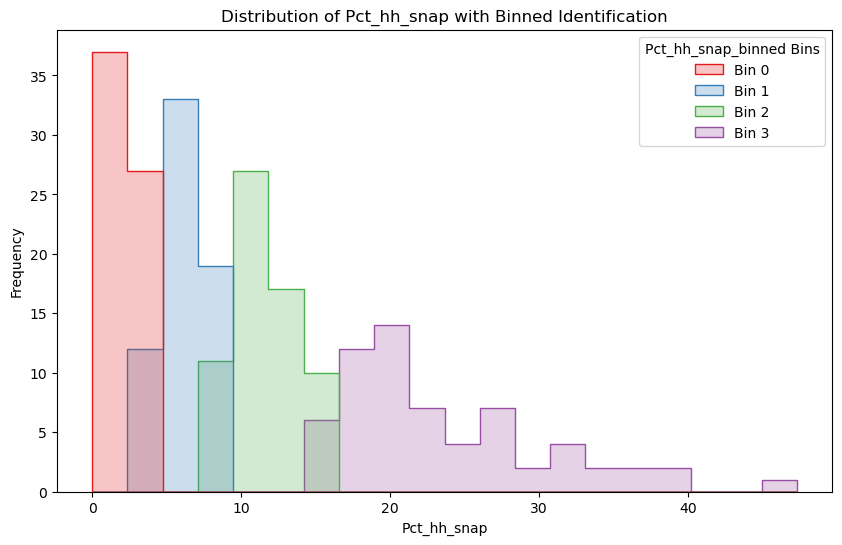

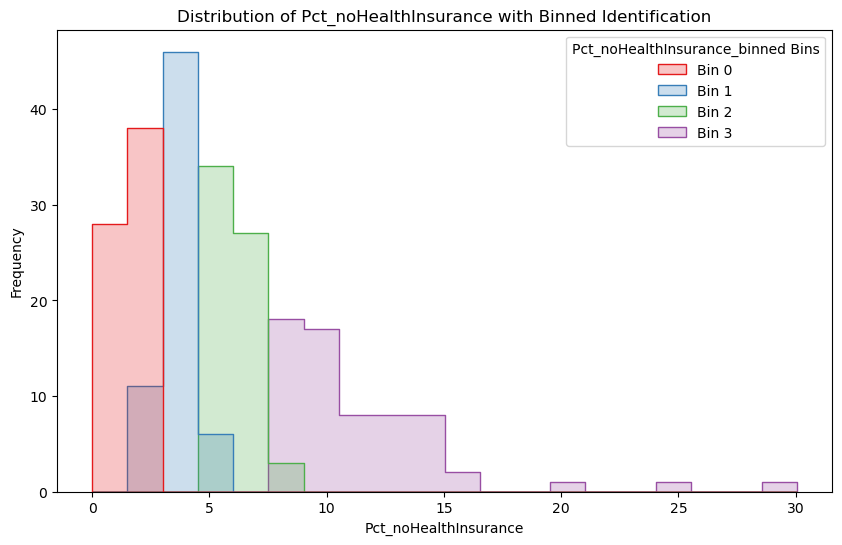

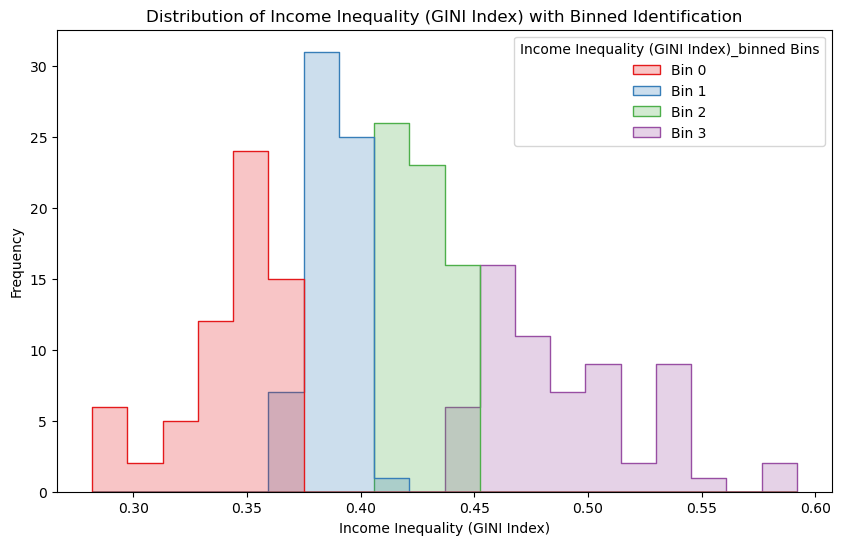

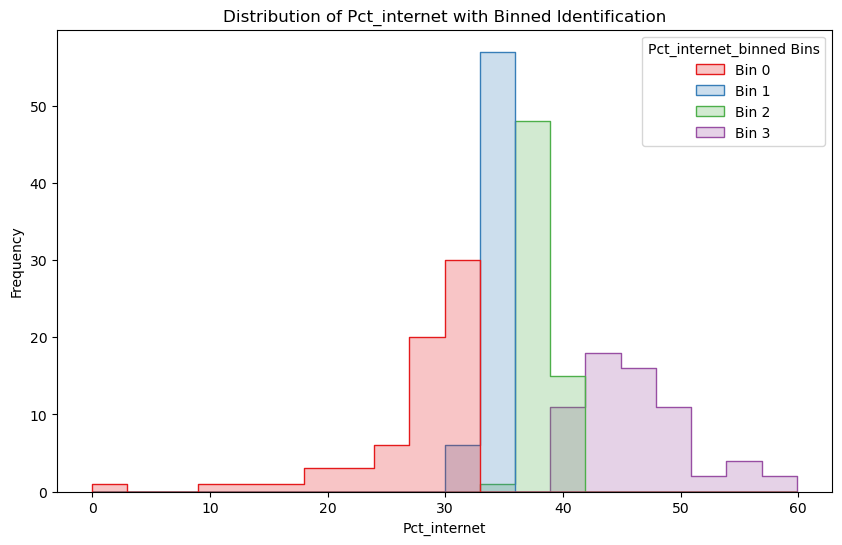

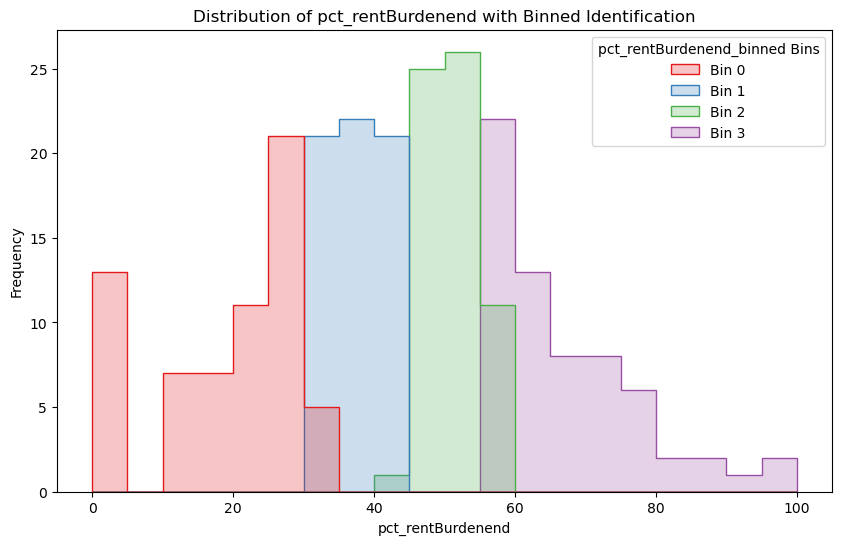

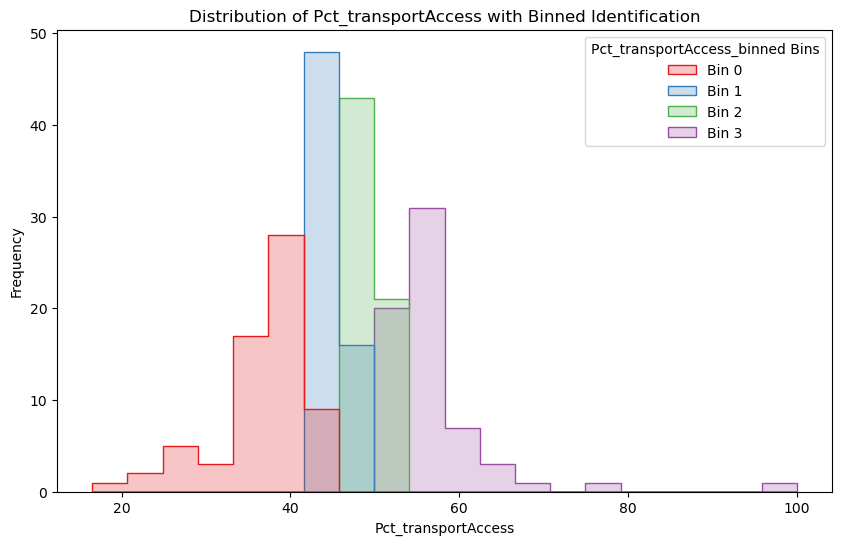

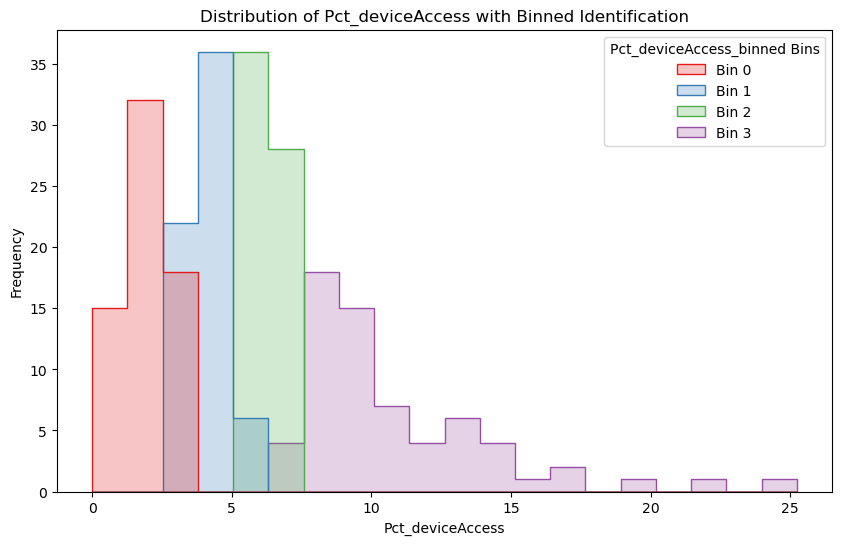

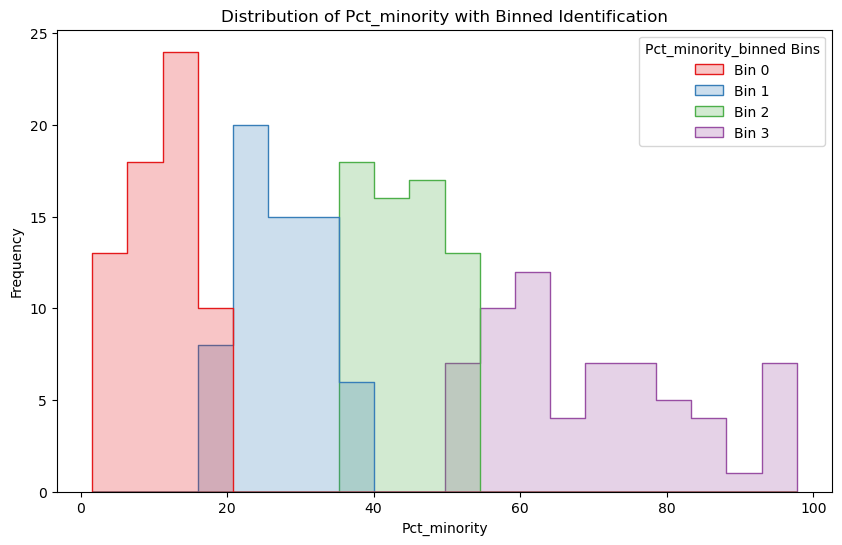

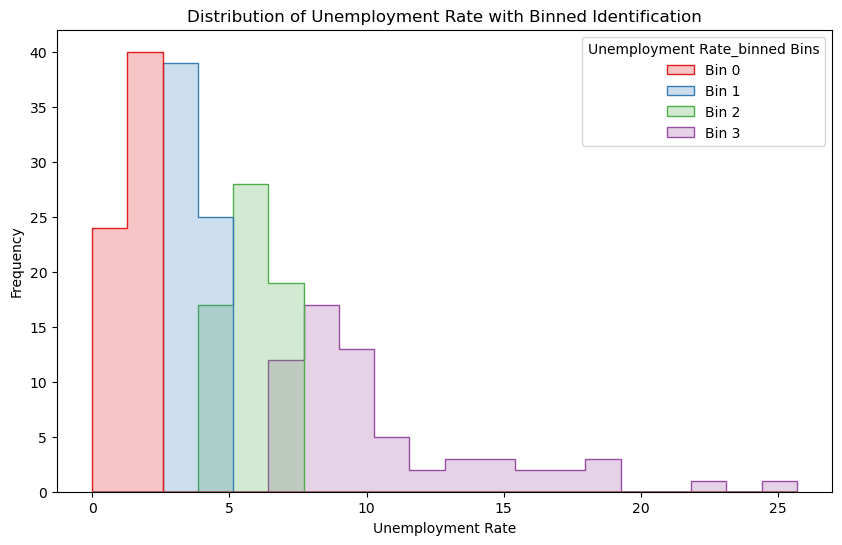

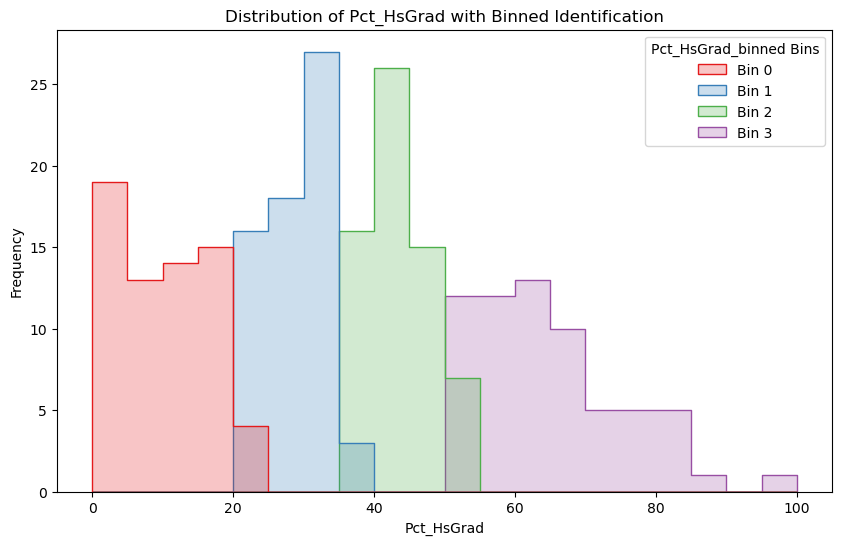

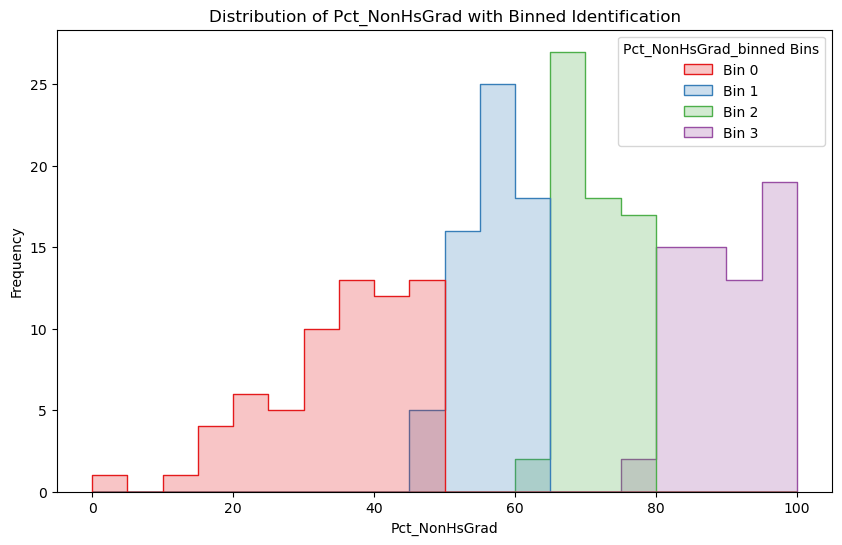

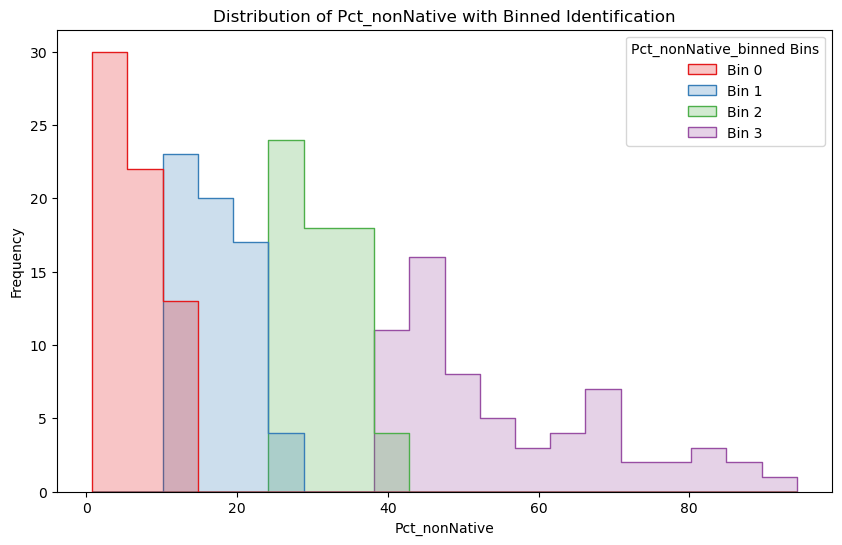

In [14]:
# Iterate through each column and plot distributions
for col in columns_to_bin:
    if f'{col}_binned' in df.columns:
        plot_distributions_with_bins(col, f'{col}_binned')

In [ ]:
df.to_csv("Census_data_binned.csv")